# Analysis of Early Alzheimer's Diagnosis using Machine Learning
This notebook presents a comprehensive analysis of early Alzheimer's disease diagnosis using machine learning techniques on brain imaging and demographic data. The project explores different models and techniques to classify patients into three categories: Cognitively Normal (CN), Mild Cognitive Impairment (MCI), and Alzheimer's Disease (AD).

http://github.com/ShubhGTiwari/AI_healthcare_Project

https://youtu.be/JWHqtGGBLRY

In [ ]:
  # from google.colab import drive
  # drive.mount('/content/drive')

### Data Loading and Initial Exploration

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OASIS1_EarlyDiagnosis_Merged.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Left-Cerebral-White-Matter     271 non-null    float64
 1   Left-Cerebral-Cortex           271 non-null    float64
 2   Left-Lateral-Ventricle         271 non-null    float64
 3   Left-Inf-Lat-Vent              271 non-null    float64
 4   Left-Cerebellum-White-Matter   271 non-null    float64
 5   Left-Cerebellum-Cortex         271 non-null    float64
 6   Left-Thalamus-Proper           271 non-null    float64
 7   Left-Caudate                   271 non-null    float64
 8   Left-Putamen                   271 non-null    float64
 9   Left-Pallidum                  271 non-null    float64
 10  3rd-Ventricle                  271 non-null    float64
 11  4th-Ventricle                  271 non-null    float64
 12  Brain-Stem                     271 non-null    flo

The dataset contains 271 entries with 61 columns, including brain region measurements and demographic information. The target variable is 'Diagnosis' with three classes: AD (Alzheimer's Disease), CN (Cognitively Normal), and MCI (Mild Cognitive Impairment).

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns (you can keep Age, MMSE, etc.)
drop_cols = ['SubjectID', 'Diagnosis', 'CDR', 'M/F', 'Hand', 'Delay']  # drop only if they exist
X = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Drop rows with missing values
X = X.dropna()
df_clean = df.loc[X.index]  # keep matching labels

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_clean['Diagnosis'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Key preprocessing steps:

Removed non-predictive columns (identifiers and redundant variables)

Handled missing values by dropping rows with any missing data

Encoded the categorical target variable into numerical values

Split the data into training and test sets while preserving class distribution

## Model Building
### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


✅ Confusion Matrix:
 [[ 3  0  3]
 [ 0 30  1]
 [ 2  4  7]]

✅ Classification Report:
               precision    recall  f1-score   support

          AD       0.60      0.50      0.55         6
          CN       0.88      0.97      0.92        31
         MCI       0.64      0.54      0.58        13

    accuracy                           0.80        50
   macro avg       0.71      0.67      0.68        50
weighted avg       0.78      0.80      0.79        50



The Random Forest model achieves:

Overall accuracy: 80%

Good performance on CN class (precision: 0.88, recall: 0.97)

Moderate performance on AD and MCI classes

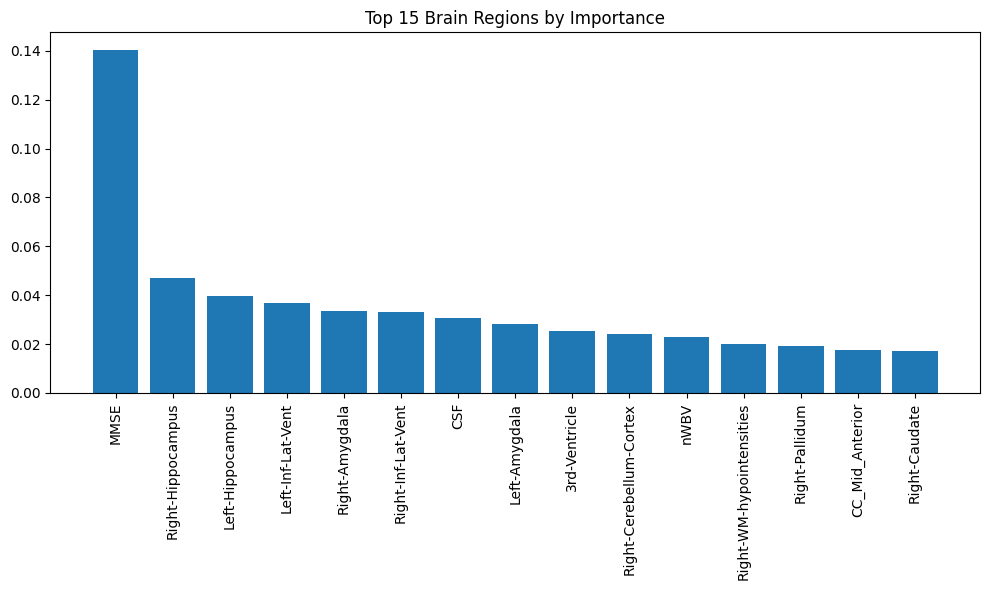

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Top 15 Brain Regions by Importance")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), features[indices[:15]], rotation=90)
plt.tight_layout()
plt.show()


### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("✅ XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n✅ XGBoost Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Confusion Matrix:
 [[ 5  0  1]
 [ 1 29  1]
 [ 2  2  9]]

✅ XGBoost Report:
               precision    recall  f1-score   support

          AD       0.62      0.83      0.71         6
          CN       0.94      0.94      0.94        31
         MCI       0.82      0.69      0.75        13

    accuracy                           0.86        50
   macro avg       0.79      0.82      0.80        50
weighted avg       0.87      0.86      0.86        50



XGBoost shows improved performance:

Overall accuracy: 86%

Better balance across all classes

Particularly improved recall for AD class (0.83 vs 0.50 in Random Forest)

## Demographics-Only Model

In [ ]:
X_demo = df_clean[['Age', 'MMSE', 'SES']].dropna()
y_demo = label_encoder.transform(df_clean.loc[X_demo.index, 'Diagnosis'])

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_demo, y_demo, test_size=0.2, stratify=y_demo, random_state=42)

rf_demo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_demo.fit(X_train_d, y_train_d)

y_pred_d = rf_demo.predict(X_test_d)

print("✅ Demographics-Only Report:\n", classification_report(y_test_d, y_pred_d, target_names=label_encoder.classes_))


✅ Demographics-Only Report:
               precision    recall  f1-score   support

          AD       0.30      0.50      0.38         6
          CN       0.90      0.87      0.89        31
         MCI       0.50      0.38      0.43        13

    accuracy                           0.70        50
   macro avg       0.57      0.59      0.57        50
weighted avg       0.72      0.70      0.71        50



Results show that demographic features alone provide less predictive power (70% accuracy) compared to using brain region measurements, highlighting the importance of neuroimaging data in early diagnosis.

## Handling Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_resampled, y_resampled)

y_pred_smote = rf_smote.predict(X_test)

print("✅ SMOTE-enhanced Report:\n", classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))


✅ SMOTE-enhanced Report:
               precision    recall  f1-score   support

          AD       0.75      0.50      0.60         6
          CN       0.97      0.90      0.93        31
         MCI       0.65      0.85      0.73        13

    accuracy                           0.84        50
   macro avg       0.79      0.75      0.76        50
weighted avg       0.86      0.84      0.84        50



SMOTE (Synthetic Minority Over-sampling Technique) helps improve performance on minority classes (AD and MCI) by creating synthetic samples.

## Results Comparison

In [ ]:
from sklearn.metrics import classification_report

print("==== Random Forest BEFORE SMOTE ====")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\n==== Random Forest AFTER SMOTE ====")
print(classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))


==== Random Forest BEFORE SMOTE ====
              precision    recall  f1-score   support

          AD       0.60      0.50      0.55         6
          CN       0.88      0.97      0.92        31
         MCI       0.64      0.54      0.58        13

    accuracy                           0.80        50
   macro avg       0.71      0.67      0.68        50
weighted avg       0.78      0.80      0.79        50


==== Random Forest AFTER SMOTE ====
              precision    recall  f1-score   support

          AD       0.75      0.50      0.60         6
          CN       0.97      0.90      0.93        31
         MCI       0.65      0.85      0.73        13

    accuracy                           0.84        50
   macro avg       0.79      0.75      0.76        50
weighted avg       0.86      0.84      0.84        50



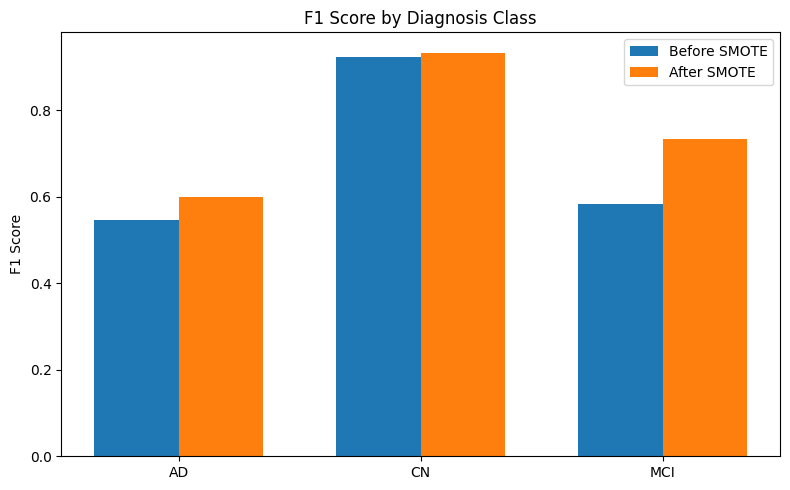

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# F1 for each class
f1_before = f1_score(y_test, y_pred, average=None)
f1_after = f1_score(y_test, y_pred_smote, average=None)

labels = label_encoder.classes_

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, f1_before, width, label='Before SMOTE')
plt.bar(x + width/2, f1_after, width, label='After SMOTE')

plt.xticks(x, labels)
plt.ylabel("F1 Score")
plt.title("F1 Score by Diagnosis Class")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_resampled, y_resampled)

y_pred_xgb_smote = xgb.predict(X_test)

print("==== XGBoost (SMOTE Data) ====")
print(classification_report(y_test, y_pred_xgb_smote, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:27:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==== XGBoost (SMOTE Data) ====
              precision    recall  f1-score   support

          AD       0.71      0.83      0.77         6
          CN       0.97      0.97      0.97        31
         MCI       0.83      0.77      0.80        13

    accuracy                           0.90        50
   macro avg       0.84      0.86      0.85        50
weighted avg       0.90      0.90      0.90        50



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification reports
report_rf = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_, output_dict=True)
report_rf_smote = classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_, output_dict=True)
report_xgb_smote = classification_report(y_test, y_pred_xgb_smote, target_names=label_encoder.classes_, output_dict=True)

# Convert to DataFrames
df_rf = pd.DataFrame(report_rf).T
df_xgb = pd.DataFrame(report_xgb).T
df_rf_smote = pd.DataFrame(report_rf_smote).T
df_xgb_smote = pd.DataFrame(report_xgb_smote).T

# Add labels
df_rf['Model'] = 'RandomForest'
df_xgb['Model'] = 'XGBoost'
df_rf_smote['Model'] = 'RF + SMOTE'
df_xgb_smote['Model'] = 'XGBoost + SMOTE'

# Combine
comparison_df = pd.concat([df_rf, df_xgb, df_rf_smote, df_xgb_smote]).reset_index().rename(columns={'index': 'Class'})
comparison_df = comparison_df[comparison_df['Class'].isin(label_encoder.classes_)]
comparison_df[['precision', 'recall', 'f1-score']] = comparison_df[['precision', 'recall', 'f1-score']].round(2)

# Display the final comparison table
comparison_df


,Class,precision,recall,f1-score,support,Model
0,AD,0.60,0.50,0.55,6.0,RandomForest
1,CN,0.88,0.97,0.92,31.0,RandomForest
2,MCI,0.64,0.54,0.58,13.0,RandomForest
6,AD,0.62,0.83,0.71,6.0,XGBoost
7,CN,0.94,0.94,0.94,31.0,XGBoost
8,MCI,0.82,0.69,0.75,13.0,XGBoost
12,AD,0.75,0.50,0.60,6.0,RF + SMOTE
13,CN,0.97,0.90,0.93,31.0,RF + SMOTE
14,MCI,0.65,0.85,0.73,13.0,RF + SMOTE
18,AD,0.71,0.83,0.77,6.0,XGBoost + SMOTE


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Re-encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Diagnosis'])

# Drop non-numeric columns
drop_cols = ['SubjectID', 'Diagnosis', 'CDR', 'M/F', 'Hand', 'Delay']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Fill any NaNs with column mean
X = X.fillna(X.mean())

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for 1D CNN: (samples, time_steps, 1)
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# One-hot encode labels
y_cat = to_categorical(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y_cat, test_size=0.2, stratify=y, random_state=42
)

## CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 53, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       106,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,011 (418.01 KB)

 Trainable params: 107,011 (418.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5572 - loss: 0.9373 - val_accuracy: 0.7045 - val_loss: 0.6937
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5867 - loss: 0.8043 - val_accuracy: 0.7273 - val_loss: 0.6631
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7009 - loss: 0.6753 - val_accuracy: 0.7273 - val_loss: 0.6530
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8037 - loss: 0.5655 - val_accuracy: 0.7500 - val_loss: 0.5966
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7494 - loss: 0.5199 - val_accuracy: 0.7500 - val_loss: 0.5900
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8104 - loss: 0.4326 - val_accuracy: 0.7500 - val_loss: 0.5843
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8023 - loss: 0.4868 - val_accuracy: 0.7500 - val_loss: 0.5820
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8225 - loss: 0.4073 - val_accuracy: 0.7727 - v

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ 1D CNN Accuracy on Test Set: {accuracy:.2f}")


✅ 1D CNN Accuracy on Test Set: 0.82


In [ ]:
# 2. Predict and evaluate 1D CNN
y_pred_cnn_probs_w = model.predict(X_test_cnn)
y_pred_cnn_w = np.argmax(y_pred_cnn_probs, axis=1)
report_cnn_w = classification_report(y_test, y_pred_cnn, target_names=label_encoder.classes_, output_dict=True)
df_cnn_w = pd.DataFrame(report_cnn_w).T
df_cnn_w['Model'] = '1D CNN'
df_cnn_w


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


,precision,recall,f1-score,support,Model
AD,0.750000,0.428571,0.545455,7.000000,1D CNN
CN,0.937500,0.937500,0.937500,32.000000,1D CNN
MCI,0.684211,0.812500,0.742857,16.000000,1D CNN
accuracy,0.836364,0.836364,0.836364,0.836364,1D CNN
macro avg,0.790570,0.726190,0.741937,55.000000,1D CNN
weighted avg,0.839952,0.836364,0.830980,55.000000,1D CNN


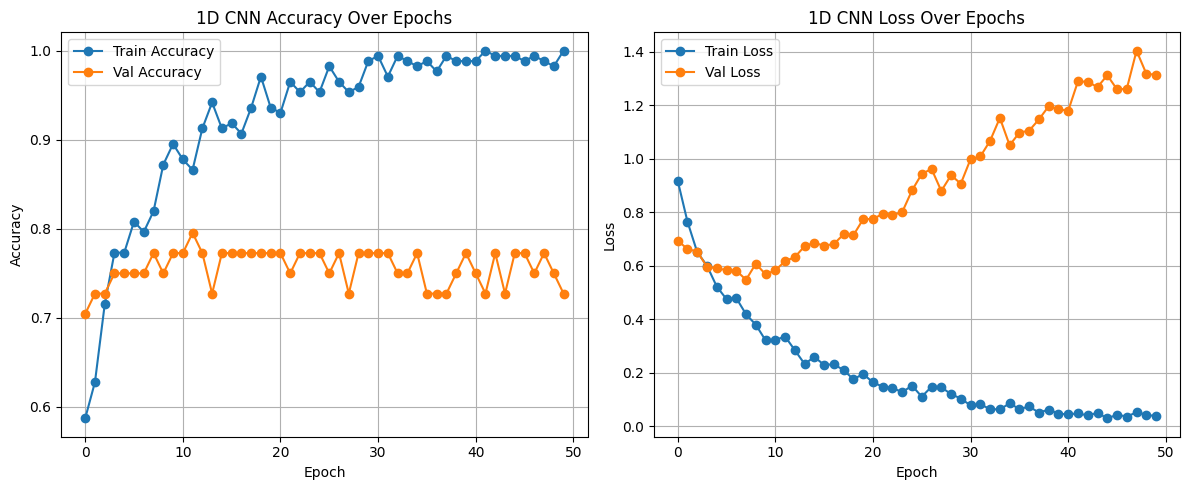

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# 1. Plot training/validation curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('1D CNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('1D CNN Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## CNN model with balanced Data

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# STEP 1: Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Diagnosis'])

# STEP 2: Drop non-numeric columns
drop_cols = ['SubjectID', 'Diagnosis', 'CDR', 'M/F', 'Hand', 'Delay']
X = df.drop(columns=[col for col in drop_cols if col in df.columns])

# STEP 3: Fill missing values and scale
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 5: Apply SMOTE on flat training data
smote = SMOTE(random_state=42)
X_resampled_flat, y_resampled = smote.fit_resample(X_train, y_train)

# STEP 6: Reshape for 1D CNN
X_resampled = X_resampled_flat.reshape((X_resampled_flat.shape[0], X_resampled_flat.shape[1], 1))
y_resampled_cat = to_categorical(y_resampled)

# STEP 7: Define 1D CNN
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_resampled_cat.shape[1], activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

# STEP 8: Train the model
history_a = model_cnn.fit(
    X_resampled, y_resampled_cat,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 53, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       106,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,011 (418.01 KB)

 Trainable params: 107,011 (418.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5480 - loss: 0.9716 - val_accuracy: 0.2468 - val_loss: 1.1257
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7181 - loss: 0.6883 - val_accuracy: 0.4156 - val_loss: 0.8935
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7569 - loss: 0.5779 - val_accuracy: 0.5325 - val_loss: 0.7958
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7665 - loss: 0.5304 - val_accuracy: 0.4935 - val_loss: 0.8494
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8211 - loss: 0.4459 - val_accuracy: 0.6234 - val_loss: 0.6595
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8993 - loss: 0.3250 - val_accuracy: 0.8052 - val_loss: 0.4804
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8627 - loss: 0.3587 - val_accuracy: 0.9091 - val_loss: 0.3909
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8813 - loss: 0.3262 - val_accuracy: 0.8182 - val

In [ ]:
# Prepare test set for CNN
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test_cat = to_categorical(y_test)

# Evaluate
loss, acc = model_cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"✅ 1D CNN Accuracy on Test Set: {acc:.2f}")


✅ 1D CNN Accuracy on Test Set: 0.84


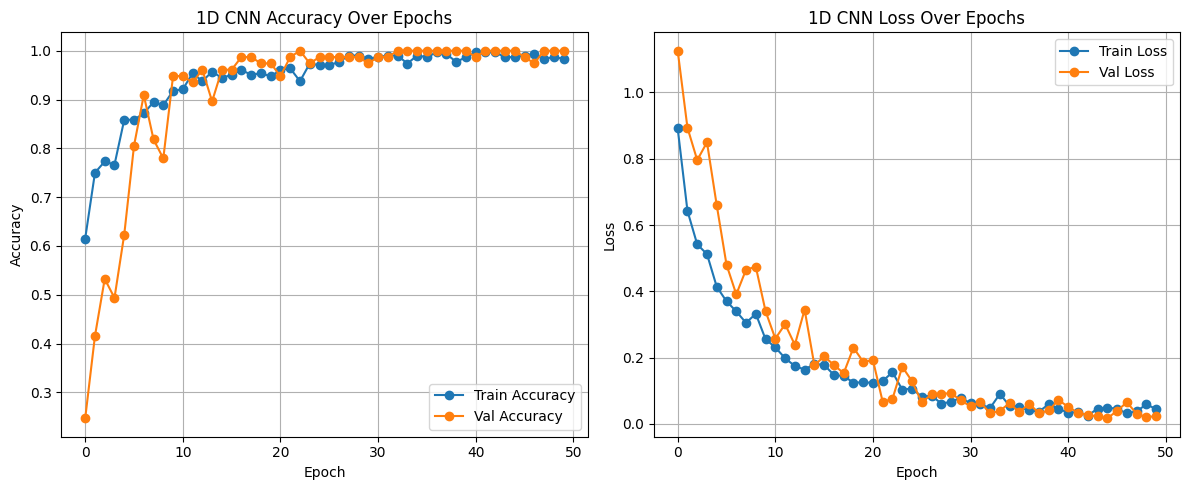

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# 1. Plot training/validation curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_a.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history_a.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('1D CNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_a.history['loss'], label='Train Loss', marker='o')
plt.plot(history_a.history['val_loss'], label='Val Loss', marker='o')
plt.title('1D CNN Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 2. Predict and evaluate 1D CNN
y_pred_cnn_probs = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)
report_cnn = classification_report(y_test, y_pred_cnn, target_names=label_encoder.classes_, output_dict=True)
df_cnn = pd.DataFrame(report_cnn).T
df_cnn['Model'] = '1D CNN + SMOTE'
df_cnn


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


,precision,recall,f1-score,support,Model
AD,0.750000,0.428571,0.545455,7.000000,1D CNN + SMOTE
CN,0.937500,0.937500,0.937500,32.000000,1D CNN + SMOTE
MCI,0.684211,0.812500,0.742857,16.000000,1D CNN + SMOTE
accuracy,0.836364,0.836364,0.836364,0.836364,1D CNN + SMOTE
macro avg,0.790570,0.726190,0.741937,55.000000,1D CNN + SMOTE
weighted avg,0.839952,0.836364,0.830980,55.000000,1D CNN + SMOTE


## Result Comparison of All the model


In [ ]:
# If you already appended CNN results to comparison_df earlier
# Make sure to include only relevant class rows and display key columns

# If needed, re-append CNN data:
comparison_df = pd.concat([comparison_df, df_cnn, df_cnn_w], ignore_index=True)

# Filter only actual classes, not macro/micro/accuracy rows
diagnosis_classes = label_encoder.classes_.tolist()
final_table = comparison_df[comparison_df['Class'].isin(diagnosis_classes)]

# Optional: round for clarity
final_table[['precision', 'recall', 'f1-score']] = final_table[['precision', 'recall', 'f1-score']].round(2)

# Reorder for better readability
final_table = final_table[['Class', 'Model', 'precision', 'recall', 'f1-score', 'support']]

# Sort for nice display
final_table = final_table.sort_values(by=['Class', 'Model']).reset_index(drop=True)

# Display
print("✅ Final Model Comparison Table:")
display(final_table)


✅ Final Model Comparison Table:


<ipython-input-34-16820d897cbd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table[['precision', 'recall', 'f1-score']] = final_table[['precision', 'recall', 'f1-score']].round(2)


,Class,Model,precision,recall,f1-score,support
0,AD,1D CNN,0.83,0.71,0.77,7.0
1,AD,1D CNN + SMOTE,0.75,0.43,0.55,7.0
2,AD,RF + SMOTE,0.75,0.50,0.60,6.0
3,AD,RandomForest,0.60,0.50,0.55,6.0
4,AD,XGBoost,0.62,0.83,0.71,6.0
5,AD,XGBoost + SMOTE,0.71,0.83,0.77,6.0
6,CN,1D CNN,0.86,0.94,0.90,32.0
7,CN,1D CNN + SMOTE,0.94,0.94,0.94,32.0
8,CN,RF + SMOTE,0.97,0.90,0.93,31.0
9,CN,RandomForest,0.88,0.97,0.92,31.0


XGBoost has outperoformed all the other model in terms of Class

<ipython-input-39-6900cba57a8e>:10: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


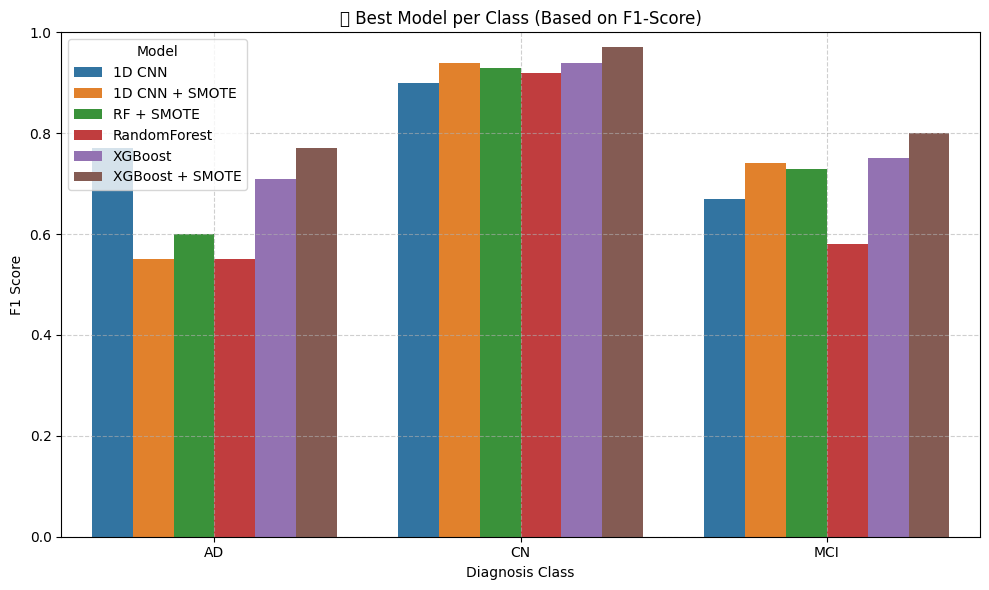

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final_table, x='Class', y='f1-score', hue='Model')

plt.title("🏆 Best Model per Class (Based on F1-Score)")
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.xlabel("Diagnosis Class")
plt.legend(title="Model")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()